## ECE495 Intro to programming neurons with Nengo

In this demonstration we will:

1. Represent a constant input value with a single neuron using Nengo
2. Understand output plots from Nengo (raster plots, decoded neural responses, tuning curves, and more)
3. Tune parameters to understand how to better represent different inputs values using one neuron
4. Repeat 1-3 with 10 neurons
5. Repeat for various time-varying input signals.

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
    
Import Nengo and other supporting libraries into your program to get started:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import nengo
from nengo.dists import Uniform
from nengo.processes import WhiteSignal
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ipython import hide_input
from nengo.utils.matplotlib import rasterplot

### Represent (i.e. Encode) Input Data using One Neuron

To do anything with data in Nengo, we must first convert the input data into spiking data using Nengo neuron ensembles. This is biologically inspired: neural populations represent time-varying signals through their spiking responses (recall the human visual system).

We start with a Nengo node that provides the input to a neuron in our Nengo model - this is essentially just a way to pass data from regular Python into a Nengo model filled with neurons. The Nengo neuron then converts the data to spikes (i.e. the neuron encodes the input data).

To understand how Nengo neurons encode inputs, we will first look at a single neuron encoding a constant value.

#### Create your input

Start with a positive value between 0 and 1.

In [9]:
nengo_inp = .5

#### Create your model

Every Nengo network requires a model. The model holds all of your nodes, neurons, connections, probes, and other functionality. 

In [10]:
model = nengo.Network(label="Representation")

#### Add to your model

You can adjust or add onto your model anytime using the same `with model:` command. 

In [11]:

# Create a model to perform the sorting
with model:

    # Add input node 
    input_node = nengo.Node(nengo_inp)

    # Add a single neuron to encode the input
    input_neuron = nengo.Ensemble(n_neurons=1, dimensions=1,
        # Set your intercept (where the neuron starts spiking)
        # uniform = values uniformly distributed 
        # between the first and second input, one for each neuron. 
        # If you want a specific value, set both inputs to same value.
        intercepts=Uniform(0,0),
        # Set the maximum firing rate of the neuron (Hz)
        max_rates=Uniform(100,100),
        # Set the neuron's firing rate to increase for values 
        # higher than (1) or lower than  (-1) your intercept
        # Values farther from the intercept elicit higher spike rates
        encoders=[[1]])

    # Connect the node to the encoding neuron
    nengo.Connection(input_node, input_neuron)

    ## Add probes to see outputs throughout the model
    # This probe captures the non-spiking input value
    input_probe_node = nengo.Probe(input_node)

    # This probe displays the decoded neural representation of the input
    input_probe_neuron = nengo.Probe(input_neuron, synapse=0.01)

    # This probe captures the actual spikes from the neuron
    spikes = nengo.Probe(input_neuron.neurons)

    # These probes captures the neuron potential    membranePotential = nengo.Probe(input_neuron.neurons, "voltage")

#### Run your model

Once you've built it, it's time to see what it can do.

In [12]:
# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


#### Analyze your model outputs

Plot the outputs collected from Nengo probes. 

(0.0, 1.0)

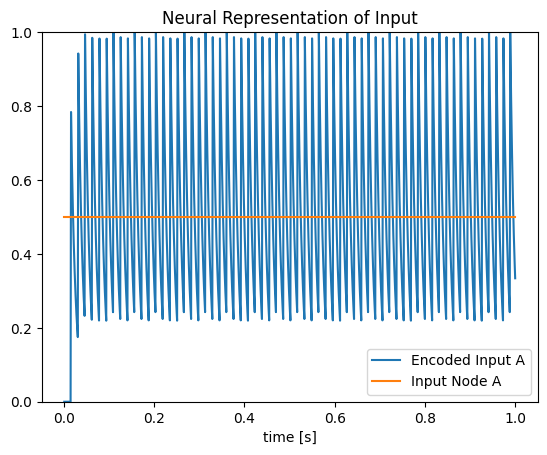

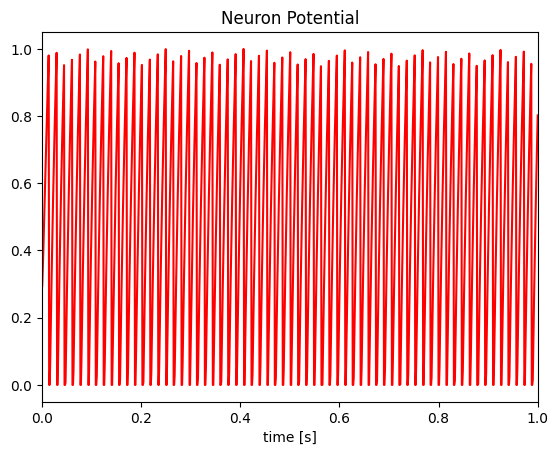

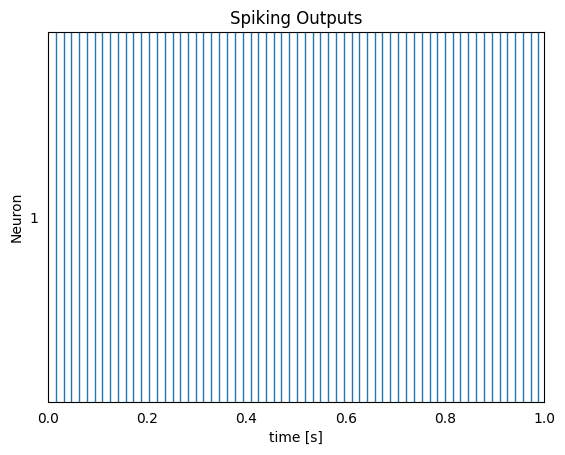

In [15]:
# Plot the input signals and decoded ensemble values
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuron], label="Encoded Input A")
plt.plot(sim.trange(), sim.data[input_probe_node], label="Input Node A")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Neural Representation of Input")

# Plot the soma voltages of the neurons
plt.figure()
plt.plot(sim.trange(), sim.data[membranePotential][:, 0], "r")
plt.xlim(0, 1)
plt.xlabel("time [s]")
plt.title("Neuron Potential")

# Plot the spiking output of the ensemble
plt.figure()
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlabel("time [s]")
plt.title("Spiking Outputs")
plt.xlim(0, 1)

We can see that this single neuron cannot perfectly represent our input value. We could fine tune parameters to a specific value to get it to perfectly represent it; however, that's not generalizable. 

We would expect constant spikes evenly spaced as we are sending in a constant value. We would expect more spikes for larger values, fewer for smaller values.

We can see that the membrane potential increases and reaches a certain value, a spike is emmitted, and the membrane potential resets.



#### Further Analysis

Input signals drive neural populations based on each neuron’s "tuning curve".

The tuning curve describes how much a particular neuron will fire as a function of the input signal. In this case, our input signal is a constant value over 1 second. We can plot the tuning curve to better understand our outputs.

Build finished in 0:00:01.                                                      


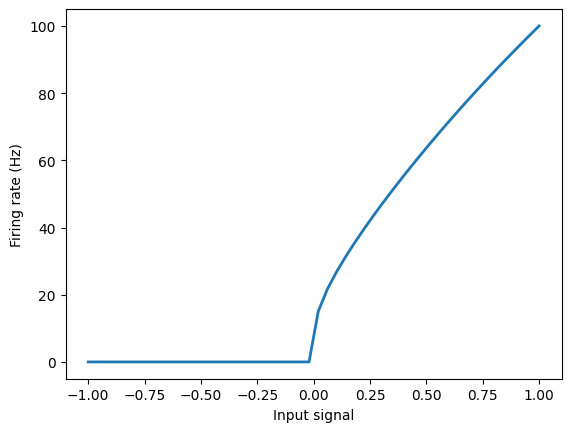

In [4]:
def aligned(n_neurons, radius=0.9):
    intercepts = np.linspace(-radius, radius, n_neurons)
    encoders = np.tile([[1], [-1]], (n_neurons // 2, 1))
    intercepts *= encoders[:, 0]
    return intercepts, encoders

with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(input_neuron, sim)

plt.figure()
plt.plot(eval_points, activities, lw=2)
plt.xlabel("Input signal")
plt.ylabel("Firing rate (Hz)")
hide_input()

Adjust these sections. 
- Might break down the code into multiple parts?
- Show neuron representation
- Show spikes and membrane potential
- Show tuning curves
- Decode manually
- Adjust parameters

**Before we move on, try hand tuning the parameters and see if you can get a single neuron to better represent one of your input values. Possibly then try representing a different value and consider why it doesn't do as well as the first one you tuned (or maybe it does better?). Play with it!**


## Represent (i.e. Encode) Input Data using Ten Neurons

To do anything with data in Nengo, we must first convert the input data into spiking data using Nengo neuron ensembles. This is biologically inspired: neural populations represent time-varying signals through their spiking responses.

We start with a Nengo node (or nodes) that provide the input to a neuron (or neurons) in our Nengo model - this is essentially just a way to pass data from regular Python into a Nengo model filled with neurons. The input node(s) will then be connected to Nengo neuron(s) that convert the data to spikes (i.e. encode the data).

To understand how Nengo neurons encode inputs, let's look at a single neuron encoding a constant value:

In [ ]:
with model:
    input = nengo.Node(lambda t: t * 2 - 1)
    input_probe = nengo.Probe(input)

In [ ]:
with nengo.Simulator(model) as sim:
    sim.run(1.0)

plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], lw=2)
plt.title("Input signal")
plt.xlabel("Time (s)")
plt.xlim(0, 1)
hide_input()